# Data Analysis for Heart Disease Dataset

### Initialization

In [20]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Categorical Findings

In [4]:
categories = {}
# get all possible values for each category (important to figure out encodings for categorical data)
for col in df.columns:
    categories[col] = df[col].dropna().unique().tolist()
for cat in categories:
    print(cat)
    print(categories[cat])

Age
[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51, 56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61, 29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71]
Sex
['M', 'F']
ChestPainType
['ATA', 'NAP', 'ASY', 'TA']
RestingBP
[140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125, 145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106, 92, 200, 122, 98, 105, 133, 95, 80, 137, 185, 165, 126, 152, 116, 0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102, 96, 143, 172, 156, 114, 127, 101, 174, 94, 148, 117, 192, 129, 164]
Cholesterol
[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147, 85

Sex: {M, F}
* can do boolean (dummy variable) encoding with 1 being M and 0 being F

ChestPainType: {ATA, NAP, ASY, TA}
* Can do one-hot coding with:
$$\begin{bmatrix}\text{ATA} \\ \text{NAP} \\ \text{ASY} \\ \text{TA}\end{bmatrix}
= \begin{bmatrix} 1, 0, 0, 0 \\ 0, 1, 0, 0 \\ 0, 0, 1, 0 \\ 0, 0, 0, 1 \end{bmatrix}$$

RestingECG: {Normal, ST, LVH}
* Can do one-hot coding with:
$$\begin{bmatrix}\text{Normal} \\ \text{ST} \\ \text{LVH} \end{bmatrix}
= \begin{bmatrix}1, 0, 0\\0,1,0\\0,0,1\end{bmatrix}$$

ExerciseAngina: {N, Y}
* Can do boolean (dummy variable) encoding with 1 being Y and 0 being N

ST_Slope: {Down, Flat, Up}
* Can do ordinal encoding with:
$$\begin{bmatrix}\text{Down}\\\text{Flat}\\\text{Up}\end{bmatrix}=\begin{bmatrix}0\\1\\2\end{bmatrix}$$

The other input features are numeric values

### Setup Data

In [10]:
# 1) Binary/dummy encodings
df['Sex_bin'] = df['Sex'].map({'M': 1, 'F': 0}).astype('int8')
df['ExerciseAngina_bin'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0}).astype('int8')

# 2) Ordinal encoding
st_order = {'Down': 0, 'Flat': 1, 'Up': 2}
df['ST_Slope_ord'] = df['ST_Slope'].map(st_order).astype('int8')

# 3) One-hot Coding
cp_dtype = CategoricalDtype(categories=['ATA', 'NAP', 'ASY', 'TA'], ordered=False)
ecg_dtype = CategoricalDtype(categories=['Normal', 'ST', 'LVH'], ordered=False)

df['ChestPainType'] = df['ChestPainType'].astype(cp_dtype)
df['RestingECG']    = df['RestingECG'].astype(ecg_dtype)

cp_ohe  = pd.get_dummies(df['ChestPainType'], prefix='CP', dtype='int8')
ecg_ohe = pd.get_dummies(df['RestingECG'],    prefix='ECG', dtype='int8')

# Ensure all expected dummy columns exist
for col in ['CP_ATA','CP_NAP','CP_ASY','CP_TA']:
    if col not in cp_ohe:
        cp_ohe[col] = 0
cp_ohe = cp_ohe[['CP_ATA','CP_NAP','CP_ASY','CP_TA']]

for col in ['ECG_Normal','ECG_ST','ECG_LVH']:
    if col not in ecg_ohe:
        ecg_ohe[col] = 0
ecg_ohe = ecg_ohe[['ECG_Normal','ECG_ST','ECG_LVH']]

# 4) Numeric features
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# 5) Build feature matrix
X_df = pd.concat(
    [
        df[numeric_cols],
        df[['Sex_bin', 'ExerciseAngina_bin', 'ST_Slope_ord']],
        cp_ohe,
        ecg_ohe,
    ],
    axis=1
)

# 6) Convert to NumPy
X = X_df.to_numpy()
y = df['HeartDisease'].to_numpy().astype('int8').reshape(-1,1)  # target

In [15]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature columns in order:")
print(list(X_df.columns))

X shape: (918, 16)
y shape: (918, 1)
Feature columns in order:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_bin', 'ExerciseAngina_bin', 'ST_Slope_ord', 'CP_ATA', 'CP_NAP', 'CP_ASY', 'CP_TA', 'ECG_Normal', 'ECG_ST', 'ECG_LVH']


<Figure size 640x480 with 0 Axes>

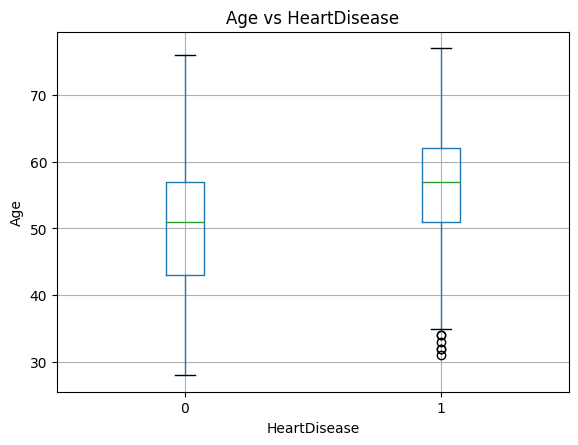

<Figure size 640x480 with 0 Axes>

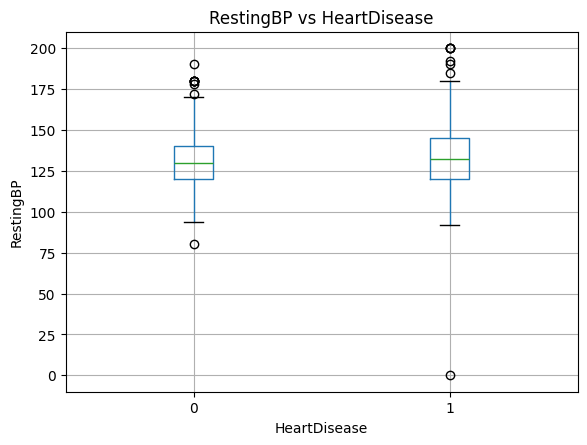

<Figure size 640x480 with 0 Axes>

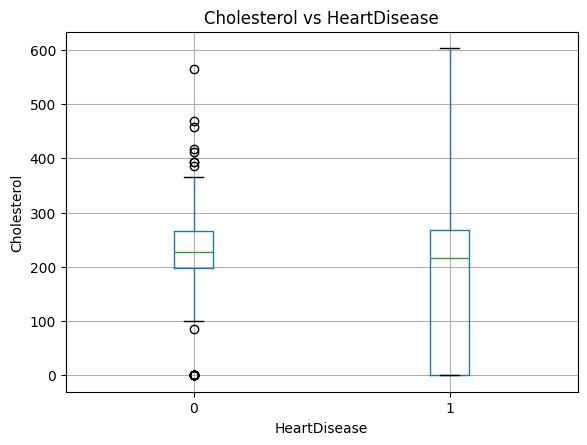

<Figure size 640x480 with 0 Axes>

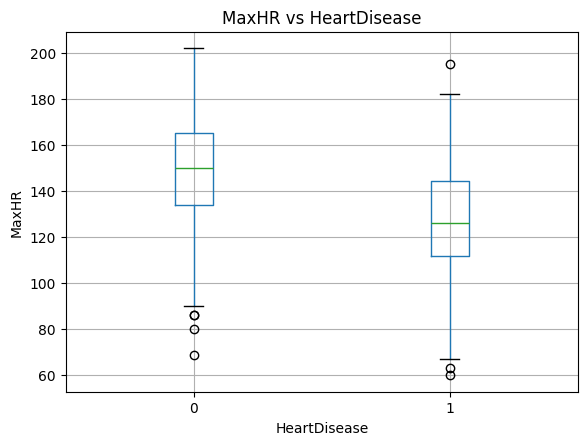

<Figure size 640x480 with 0 Axes>

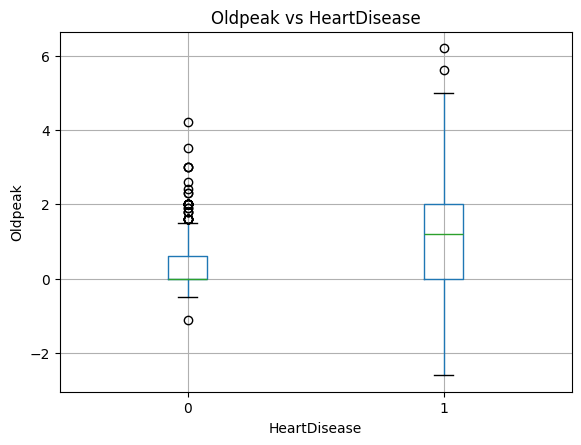

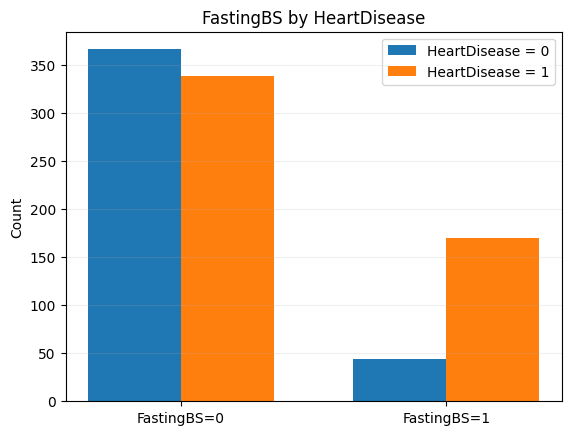

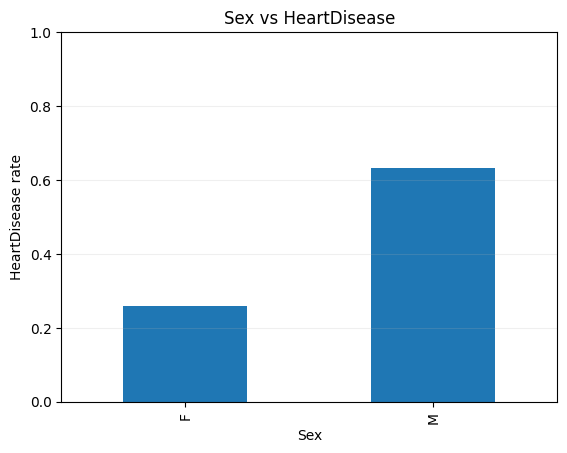

/var/folders/dk/th9c4kyd1xsg3v8mw8s8d9_40000gn/T/ipykernel_1583/3681440535.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(col)[target].mean()


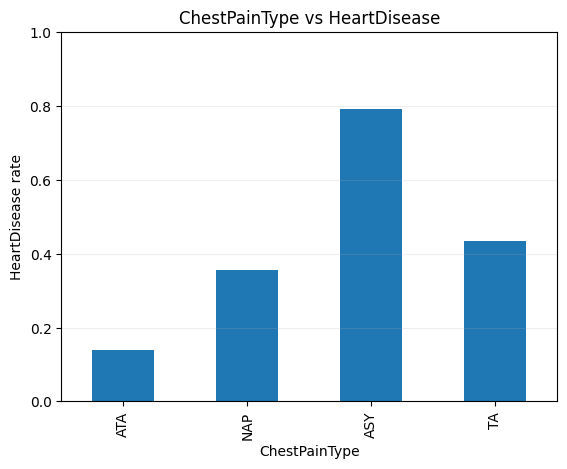

/var/folders/dk/th9c4kyd1xsg3v8mw8s8d9_40000gn/T/ipykernel_1583/3681440535.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(col)[target].mean()


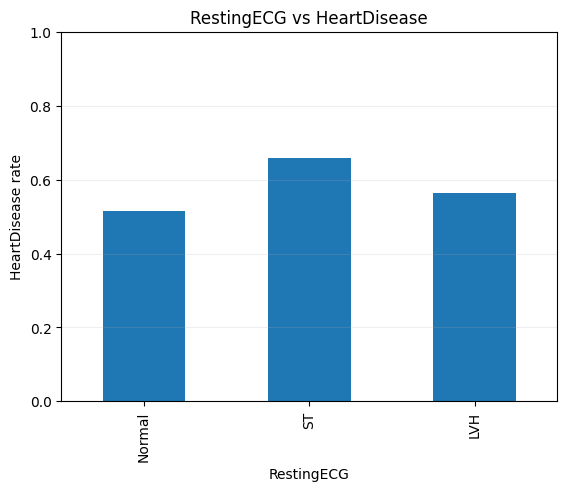

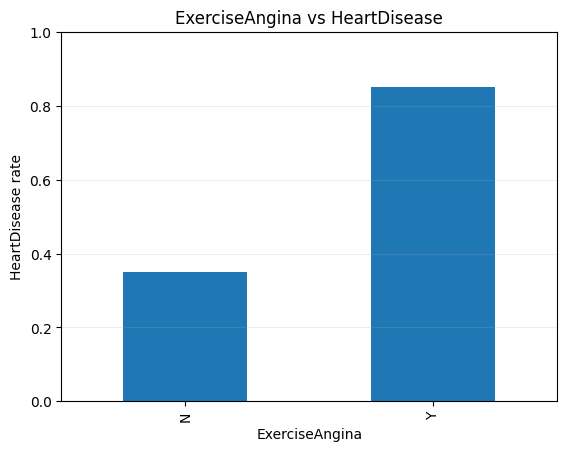

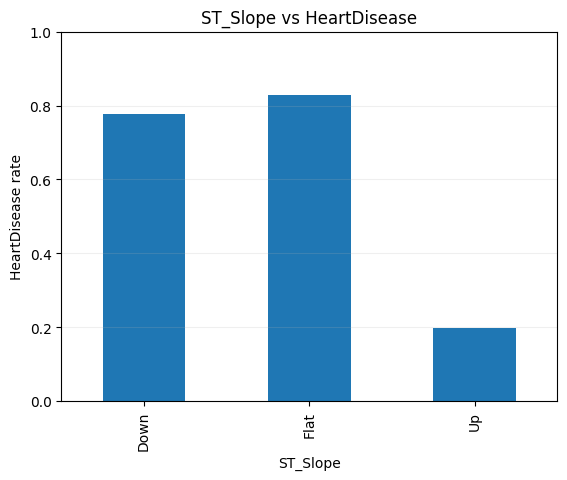

In [22]:
target = 'HeartDisease'

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_numeric_cols = ['FastingBS']  # known binary numeric
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# ---------- NUMERIC FEATURES (BOXPLOTS) ----------
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by=target)
    plt.title(f"{col} vs HeartDisease")
    plt.suptitle("")  # remove pandas automatic title
    plt.xlabel("HeartDisease")
    plt.ylabel(col)
    plt.show()

# ---------- BINARY NUMERIC FEATURES (BAR COUNTS) ----------
for col in binary_numeric_cols:
    counts = df.groupby([col, target]).size().unstack(fill_value=0)
    plt.figure()
    
    # two bars for 0/1 separated by target
    x = np.arange(2)
    width = 0.35
    plt.bar(x - width/2, counts[0], width, label='HeartDisease = 0')
    plt.bar(x + width/2, counts[1], width, label='HeartDisease = 1')

    plt.xticks(x, [f"{col}=0", f"{col}=1"])
    plt.ylabel("Count")
    plt.title(f"{col} by HeartDisease")
    plt.legend()
    plt.grid(axis='y', alpha=0.2)
    plt.show()

# ---------- CATEGORICAL FEATURES (BAR OF POSITIVE RATE) ----------
for col in categorical_cols:
    rates = df.groupby(col)[target].mean()
    plt.figure()
    rates.plot(kind="bar")
    plt.ylim(0, 1)
    plt.ylabel("HeartDisease rate")
    plt.title(f"{col} vs HeartDisease")
    plt.grid(axis='y', alpha=0.2)
    plt.show()